In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras import layers
from keras import models

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


Using TensorFlow backend.


For this week's study, I will start from the simple construction of CNN in tensorflow. It would be necessary to use the mature APIs from Keras. The datasets using here are classic examples using to test the neural networks, which are the Fashion MNIST dataset and the Hand-writing MNIST dataset. I would reload these two datasets first.

In [8]:
fashion_mnist = keras.datasets.fashion_mnist # Initialize the fashion_mnist data object
(train_img, train_label), (test_img, test_label) = fashion_mnist.load_data()

mnist = keras.datasets.mnist # Initialize the mnist hand-writing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.size)
print(y_train.size)

47040000
60000


**Simple Example of CNN structure implementation**

We could use the MNIST data for a simple example of a CNN structure from 1 layer to 3 layers by Keras. Before the training, one important thing is to do the data preparation. We need to transfer the data into the form for training.

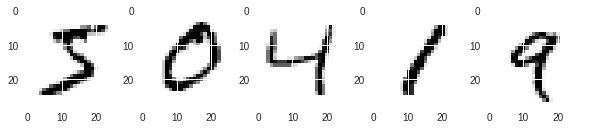

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
# Data preparation of MNIST Handwriting images
x_train = x_train.reshape((60000,28,28,1)) # 60000 training images. Each image has 28 by 28 pixels with 1 colour channel
x_train = x_train.astype('float32')/255 # Normalize each pixel's value
x_test = x_test.reshape((10000,28,28,1)) # 10000 testing images.
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train) # Converts the label class vector (integers) to binary class matrix.
y_test = to_categorical(y_test)

fig = plt.figure(figsize = (10,50))
ax = fig.add_subplot(1,5,1)
plt.imshow(x_train[0].reshape((28,28)))
ax = fig.add_subplot(1,5,2)
plt.imshow(x_train[1].reshape((28,28)))
ax = fig.add_subplot(1,5,3)
plt.imshow(x_train[2].reshape((28,28)))
ax = fig.add_subplot(1,5,4)
plt.imshow(x_train[3].reshape((28,28)))
ax = fig.add_subplot(1,5,5)
plt.imshow(x_train[4].reshape((28,28)))
plt.show()
print(y_train[0:4])

We would build an example of one simple layer Convolutional Neural Network. In keras, we can use the 'model' and 'layers' packs to do the construction. Usually one layer of Convolutional Neural Network would have a layer of Convolution operation (Distinguish the convolution operation for 1-dimensional data or 2-dimensional data), a layer of activation (usually we can use a RELU activation layer), a layer of Pooling (usaully we could the MaxPooling).

After the structure of CNN, we want to accomplish our goal. Here the goal is to do the classification, then after the one layer CNN, we would want to flatten the output layer (out put of the CNN structure) first and use the fully-connected activation layer (RELU). Then we will use a final fully-connected sigmoid/softmax layer to have our results for classification. We could code it step by step. 

In [0]:
# One simple layer of CNN
CNN_one_layer = models.Sequential() # Define sequential model so that we could keep adding different layers
CNN_one_layer.add(layers.Conv2D(filters=16,kernel_size=(4,4),padding='valid',activation='relu',input_shape=(28,28,1)))
# Here the attribute 'padding' is actually asking the boundary would be counted in or not. 'valid' means not counted in.
CNN_one_layer.add(layers.MaxPooling2D((4,4))) # Add the Pooling layer

print(CNN_one_layer.summary()) # Track the Output dimension and the number of the parameters

CNN_one_layer.add(layers.Flatten())
CNN_one_layer.add(layers.Dense(16,activation='relu'))
CNN_one_layer.add(layers.Dense(10,activation='softmax')) # Remember the final output's size is 10 because we have only 10 classes

print(CNN_one_layer.summary())

CNN_one_layer.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy']) # Model compile
CNN_one_layer.fit(x_train,y_train,epochs=1, batch_size=16) # Start the training Process
_,test_accuracy = CNN_one_layer.evaluate(x_test,y_test) # Calculate the test accuracy
print('Test accuracy:', test_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 16)        272       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
Total params: 272
Trainable params: 272
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 16)        272       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1

After we have the basic idea of the construction, we could just build more layers. To make the training process more complete, it would be better to include the K-Fold cross validation (Though MNIST data just a very simple dataset). We can import KFOLD from sk-learn and combine it into the training process by a simple for loop.

In [0]:
model_mnist = models.Sequential()
model_mnist.add(layers.Conv2D(16,(4,4),activation='relu',input_shape=(28,28,1)))
model_mnist.add(layers.MaxPooling2D(2,2))
model_mnist.add(layers.Conv2D(32,(3,3),activation='relu'))
model_mnist.add(layers.MaxPooling2D(2,2))
model_mnist.add(layers.Conv2D(32,(2,2),activation='relu'))

model_mnist.add(layers.Flatten())
model_mnist.add(layers.Dense(32,activation='relu'))
model_mnist.add(layers.Dense(10,activation='softmax'))

print(model_mnist.summary())

model_mnist.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model_mnist.fit(x_train,y_train,epochs=5, batch_size=16)
_,test_accuracy = model_mnist.evaluate(x_test,y_test)
print('Test accuracy:', test_accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 25, 25, 16)        272       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 32)          4128      
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                16416     
__________

The basic neural networks just have a very simple idea that you could think you build a layer of logistic regression among a layer of logistic regression. A densily connected network would be much easir to construct and train. However, to sequential data, especially the 2-D sequential data (images), CNN would normally have a better result. The convolution operations help a lot. The fully connected networks would try to learn global patterns among the whole input feature space. But with the convolution operations, local patterns will be discovered and exaggrated. For instance, detect the patterns on some edges might give a more efficient classification result.

**We could use the Fully Connected Structure by Tensorflow**

In [10]:
# The code basically follow the tutorial from Tensorflow
train_img = train_img / 255.0
test_img = test_img / 255.0

model_fashion_dense = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_fashion_dense.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_fashion_dense.fit(train_img, train_label, epochs=5)
_, test_acc = model_fashion_dense.evaluate(test_img, test_label)
print('Test accuracy:', test_acc)

Epoch 1/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.4979 - acc: 0.8263
Epoch 2/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.3722 - acc: 0.8655
Epoch 3/5
60000/60000 [==============================] - 5s 92us/step - loss: 0.3360 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.3122 - acc: 0.8846
Epoch 5/5
10000/10000 [==============================] - 0s 30us/step
Test accuracy: 0.869


**We could still use a CNN**

In [0]:
train_img = train_img.reshape((60000,28,28,1)) # 60000 training images. Each image has 28 by 28 pixels with 1 colour channel
test_img = test_img.reshape((10000,28,28,1)) # 10000 testing images.
train_label = to_categorical(train_label) # Converts the label class vector (integers) to binary class matrix.
test_label = to_categorical(test_label)

In [12]:
model_fashion = models.Sequential()
model_fashion.add(layers.Conv2D(16,(4,4),activation='relu',input_shape=((28,28,1))))
model_fashion.add(layers.MaxPooling2D(2,2))
model_fashion.add(layers.Conv2D(32,(2,2),activation='relu'))
model_fashion.add(layers.Flatten())
model_fashion.add(layers.Dense(32,activation='relu'))
model_fashion.add(layers.Dense(10,activation='softmax'))

model_fashion.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model_fashion.fit(train_img, train_label,epochs=5, batch_size=32)
_,test_accuracy = model_fashion.evaluate(test_img,test_label)
print('Test accuracy:', test_accuracy)

Epoch 1/5
60000/60000 [==============================] - 35s 591us/step - loss: 0.4553 - acc: 0.8367
Epoch 2/5
60000/60000 [==============================] - 35s 590us/step - loss: 0.3104 - acc: 0.8888
Epoch 3/5
60000/60000 [==============================] - 36s 601us/step - loss: 0.2651 - acc: 0.9041
Epoch 4/5
60000/60000 [==============================] - 35s 591us/step - loss: 0.2392 - acc: 0.9125
Epoch 5/5
10000/10000 [==============================] - 3s 262us/step
Test accuracy: 0.9046


**We would want to do a little visualization of our CNN training process to have a better idea about the convolution operations.**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 16)        272       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        2080      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                123936    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 126,618
Trainable params: 126,618
Non-trainable params: 0
_________________________________________________________________


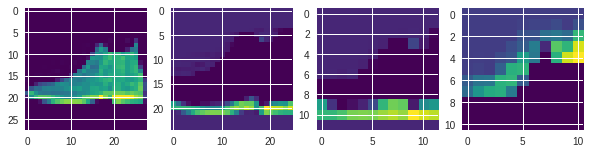

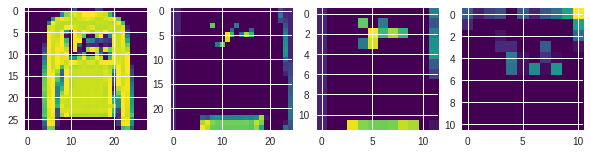

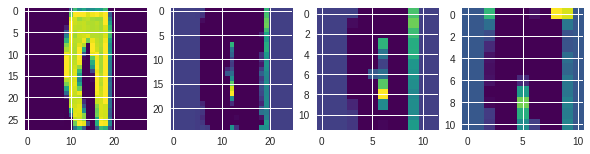

In [16]:
model_fashion.summary()

# Extract the outputs of the top 3 layers
model_fashion_layer_outputs = [layer.output for layer in model_fashion.layers[:3]]
# Creates a model to return the outputs given the model input
activation_model_fashion = models.Model(inputs=model_fashion.input,outputs=model_fashion_layer_outputs)

# With the input test images, predict the outputs for each layer activation
activations_fashion = activation_model_fashion.predict(test_img)
# Seperate each layer activation
first_layer_activation = activations_fashion[0]
second_layer_activation = activations_fashion[1]
third_layer_activation = activations_fashion[2]

# Plot out the original image and each layer activation
r = 3
for i in range(r):
  fig = plt.figure(figsize = (10,40))
  ax = fig.add_subplot(1,4,1)
  plt.imshow(test_img[i].reshape((28,28)),cmap='viridis')
  ax = fig.add_subplot(1,4,2)
  plt.imshow(first_layer_activation[i,:,:,10],cmap='viridis')
  ax = fig.add_subplot(1,4,3)
  plt.imshow(second_layer_activation[i,:,:,10],cmap='viridis')
  ax = fig.add_subplot(1,4,4)
  plt.imshow(third_layer_activation[i,:,:,10],cmap='viridis')
  

Here I show the 10th channel of each layer's activation. We could see the max-pooling operation very clearly that it exaggerate the feature chosen/activated from the last layer. In the third layer, I used another convolution operation and the 10th channel of the result activation just changed to some other features.

**Visualize every channel in activation layers**

['conv2d_1', 'max_pooling2d_1', 'conv2d_2']


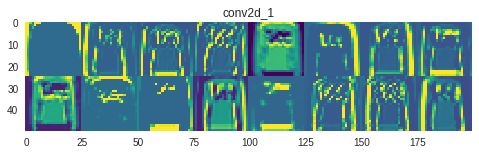

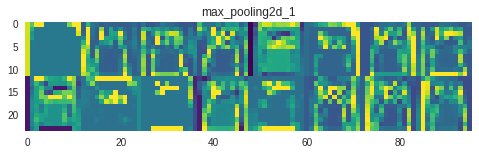

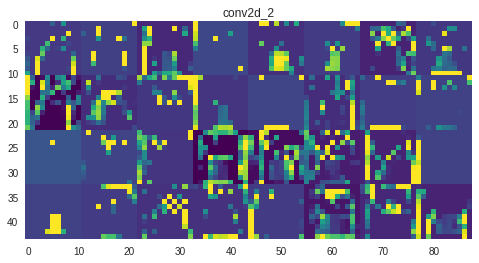

In [24]:
# Record the names of Conv layers
layer_names = [layer.name for layer in model_fashion.layers[:3]]
print(layer_names)

# Set number of channels displayed in a row
images_per_row = 8

# The loop to display all channels
for layer_name, layer_activation in zip(layer_names, activations_fashion):
  # Number of features in a feature map
  n_features = layer_activation.shape[-1] 
  # Size of the feature map
  size = layer_activation.shape[1]
  
  # Calculate the number of columns to display
  n_cols = n_features // image_per_row
  # Set up the display gird matrix
  disply_grid = np.zeros((size*n_cols,images_per_row*size))
  
  for col in range(n_cols):
    for row in range(image_per_row):
      channel_image = layer_activation[1,:,:,col*images_per_row+row]
      # Operations to make the visualization better
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image,0,255).astype('uint8')
      # Display the grid
      disply_grid[col*size:(col+1)*size, row*size:(row+1)*size] = channel_image
      
  scale = 1.0/size
  plt.figure(figsize=(scale*disply_grid.shape[1],scale*disply_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(disply_grid,aspect='auto',cmap='viridis')
  

The first layer maintain most of the information from the orignal image. When it goes to the second layer, some key patterns have already been encoded and those blank filters just mean that the pattern encoded by the filter isn't found in the input image. **As a result, the sparsity of the activations increases with the depth of the layer.**

**Reference**:

Deep Learning with Python by Francois Chollet